# PRCP-1023-JohnsHopkinsCovid19

## OVERVIEW

This project involves analyzing COVID-19 trends, including confirmed cases and deaths, to understand the spread and impact of the pandemic. The analysis focuses on daily changes, geographical patterns, and key insights to support data-driven decision-making in public health. Tools like Python and pandas are used for data processing, visualization, and deriving actionable insights from the evolving pandemic data.

## Domain Analysis

- Province/State – Name of the state, province, or county (can be empty).
- Country/Region – Name of the country or region.
- Lat – Latitude of the location.
- Long – Longitude of the location.
- Dates – Each column represents the cumulative confirmed COVID-19 cases for a specific day, starting from the first reported date.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


## MERGE ALL 3 DATASET INTO ONE

In [4]:
# Melt (reshape wide → long)
confirmed_melt = confirmed.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Confirmed"
)

deaths_melt = deaths.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Deaths"
)

recovered_melt = recovered.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="Recovered"
)

# Merge all into one dataframe
df = confirmed_melt.merge(
    deaths_melt,
    on=["Province/State", "Country/Region", "Lat", "Long", "Date"],
    how="left"
).merge(
    recovered_melt,
    on=["Province/State", "Country/Region", "Lat", "Long", "Date"],
    how="left"
)

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

/var/folders/sb/x0v0_3pd1_sbq52slvbbr2m40000gn/T/ipykernel_70876/936118274.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [6]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0.0,0.0
...,...,...,...,...,...,...,...,...
64899,NaN,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265.0,24428.0
64900,NaN,Western Sahara,24.215500,-12.885800,2020-09-21,10,1.0,8.0
64901,NaN,Yemen,15.552727,48.516388,2020-09-21,2028,586.0,1235.0
64902,NaN,Zambia,-13.133897,27.849332,2020-09-21,14175,331.0,13629.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  19764 non-null  object        
 1   Country/Region  64904 non-null  object        
 2   Lat             64904 non-null  float64       
 3   Long            64904 non-null  float64       
 4   Date            64904 non-null  datetime64[ns]
 5   Confirmed       64904 non-null  int64         
 6   Deaths          62952 non-null  float64       
 7   Recovered       60268 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.0+ MB


In [8]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered
count,64904.000000,64904.000000,64904,6.490400e+04,62952.000000,6.026800e+04
mean,21.076624,22.829441,2020-05-22 12:00:00,3.338211e+04,1382.986625,2.073073e+04
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00
25%,6.611100,-15.310100,2020-03-22 18:00:00,1.200000e+01,0.000000,1.000000e+00
50%,22.820850,20.921188,2020-05-22 12:00:00,3.330000e+02,4.000000,1.550000e+02
75%,41.153300,78.962880,2020-07-22 06:00:00,3.269000e+03,66.000000,1.602000e+03
max,71.706900,178.065000,2020-09-21 00:00:00,6.856884e+06,199865.000000,4.396399e+06
std,24.857935,70.059807,NaN,2.565391e+05,9126.549743,1.538861e+05


## Feature Selection

#### Creating new features for EDA
- Active cases

- Mortality rate
- Recovery rate

In [9]:
df["Active_Cases"] = df["Confirmed"] - (df["Deaths"] + df["Recovered"])

df["Mortality_Rate"] = np.where(df["Confirmed"] > 0,df["Deaths"] / df["Confirmed"],0)

df["Recovery_Rate"] = np.where(df["Confirmed"] > 0,df["Recovered"] / df["Confirmed"],0)

df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active_Cases,Mortality_Rate,Recovery_Rate
64899,NaN,West Bank and Gaza,31.952200,35.233200,2020-09-21,36151,265.0,24428.0,11458.0,0.007330,0.675721
64900,NaN,Western Sahara,24.215500,-12.885800,2020-09-21,10,1.0,8.0,1.0,0.100000,0.800000
64901,NaN,Yemen,15.552727,48.516388,2020-09-21,2028,586.0,1235.0,207.0,0.288955,0.608974
64902,NaN,Zambia,-13.133897,27.849332,2020-09-21,14175,331.0,13629.0,215.0,0.023351,0.961481
64903,NaN,Zimbabwe,-19.015438,29.154857,2020-09-21,7683,225.0,5924.0,1534.0,0.029285,0.771053


## EDA (Exploratory Data Analysis)

### Validate Inconsistency of India

### Check High Inconsistenties in countries

In [10]:
country_daily = df.groupby(["Country/Region", "Date"], as_index=False)["Confirmed"].sum()

country_daily["Confirmed_diff"] = country_daily.groupby("Country/Region")["Confirmed"].diff()

inconsistent_rows = country_daily[country_daily["Confirmed_diff"] < 0]

inconsistency_summary = (
    inconsistent_rows.groupby("Country/Region")
    .agg(
        Inconsistency_Count=("Confirmed_diff", "size"),
        Total_Negative_Drop=("Confirmed_diff", "sum"),
        First_Inconsistent_Date=("Date", "min"),
        Last_Inconsistent_Date=("Date", "max")
    )
    .reset_index()
    .sort_values(by="Inconsistency_Count", ascending=False)
)

print("=== Inconsistency Summary for All Countries ===")
print(inconsistency_summary)

print("\n=== Detailed Inconsistent Rows ===")
print(inconsistent_rows.head(20))

=== Inconsistency Summary for All Countries ===
         Country/Region  Inconsistency_Count  Total_Negative_Drop  \
7                France                    6              -6568.0   
5               Ecuador                    4             -11066.0   
26              Taiwan*                    2                 -3.0   
20          New Zealand                    2                 -2.0   
27               Uganda                    2               -105.0   
6               Finland                    2                 -8.0   
25                Spain                    2             -10406.0   
24           San Marino                    2                -28.0   
22     Papua New Guinea                    1                -16.0   
19                Nepal                    1                 -1.0   
21                Niger                    1                 -4.0   
0   Antigua and Barbuda                    1                 -1.0   
23             Portugal                    1           

### Key Findings:

#### Countries with the highest number of inconsistencies:
1] France: 6 instances, total drop of 6,568 cases (from 22 April 2020 to 28 June 2020).

2] Ecuador: 4 instances, total drop of 11,066 cases (from 7 May 2020 to 7 September 2020).

3] Other countries with multiple inconsistencies include Taiwan, New Zealand, Uganda, Finland, Spain, and San Marino*.

#### Magnitude of drops:
- Some countries experienced significant negative drops in reported cases, e.g., Ecuador (-7,953 cases on 7 September 2020) and France (-2,510 cases on 29 April 2020).

- Smaller drops were observed in countries like China (-1), New Zealand (-2), and Uganda (-105), indicating minor adjustments or corrections.

#### Single occurrence inconsistencies:
- Several countries had only one reporting anomaly, including Honduras (-20 cases), Guyana (-15), Cyprus (-17), and Colombia (-315).

- These are likely due to reporting corrections or reclassification of cases.

#### Temporal patterns:
- The inconsistencies are spread across different dates between March and September 2020, reflecting periodic data corrections rather than continuous errors.

In [11]:
global_daily = df.groupby("Date", as_index=False)[["Confirmed", "Deaths", "Recovered"]].sum()

global_daily["New_Confirmed"] = global_daily["Confirmed"].diff().fillna(global_daily["Confirmed"])
global_daily["New_Deaths"] = global_daily["Deaths"].diff().fillna(global_daily["Deaths"])
global_daily["New_Recovered"] = global_daily["Recovered"].diff().fillna(global_daily["Recovered"])

### Global cumulative covid-19 cases over time

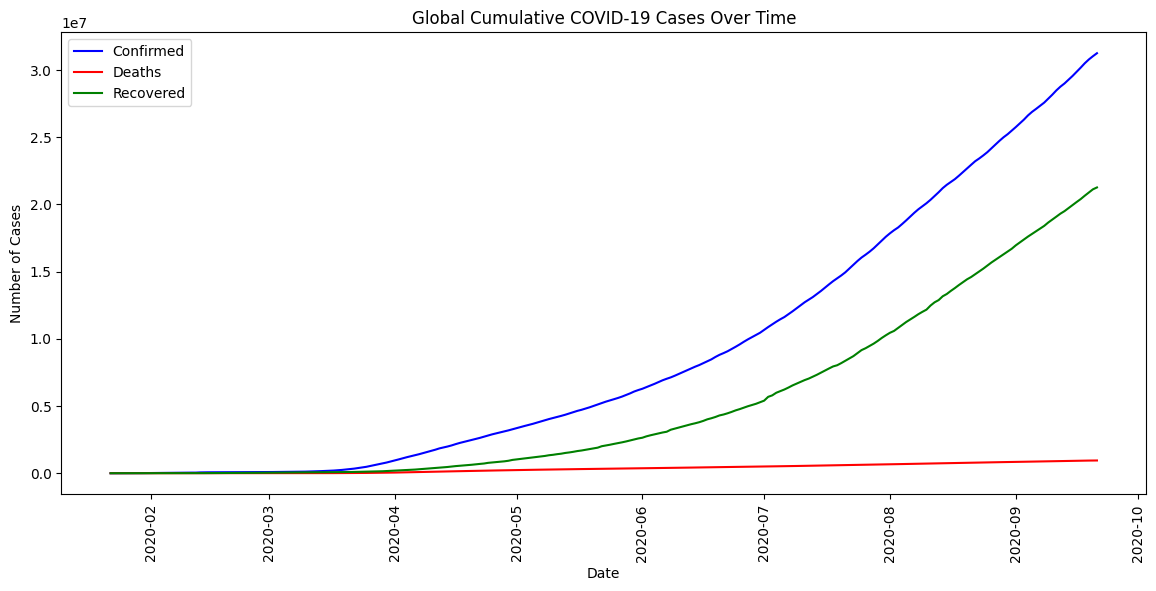

In [12]:
plt.figure(figsize=(14,6))
plt.plot(global_daily["Date"], global_daily["Confirmed"], label="Confirmed", color="blue")
plt.plot(global_daily["Date"], global_daily["Deaths"], label="Deaths", color="red")
plt.plot(global_daily["Date"], global_daily["Recovered"], label="Recovered", color="green")
plt.xticks(rotation=90)
plt.title("Global Cumulative COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

#### SUMMARY of Global Cumulative cases
The graph shows the cumulative totals for confirmed cases, deaths, and recoveries globally, providing a long-term perspective. Confirmed cases (blue) exhibit nearly exponential growth from February through September 2020, reaching over 30 million by the end of the period. The number of recoveries (green) also grows steeply, consistently trailing behind confirmed cases. Cumulative deaths (red) increase gradually but are much lower in comparison. This visualization emphasizes the relentless and accelerating expansion of the pandemic on a global scale, as well as the growing number of recoveries alongside it.

### Globally Covid-19 Daily New cases

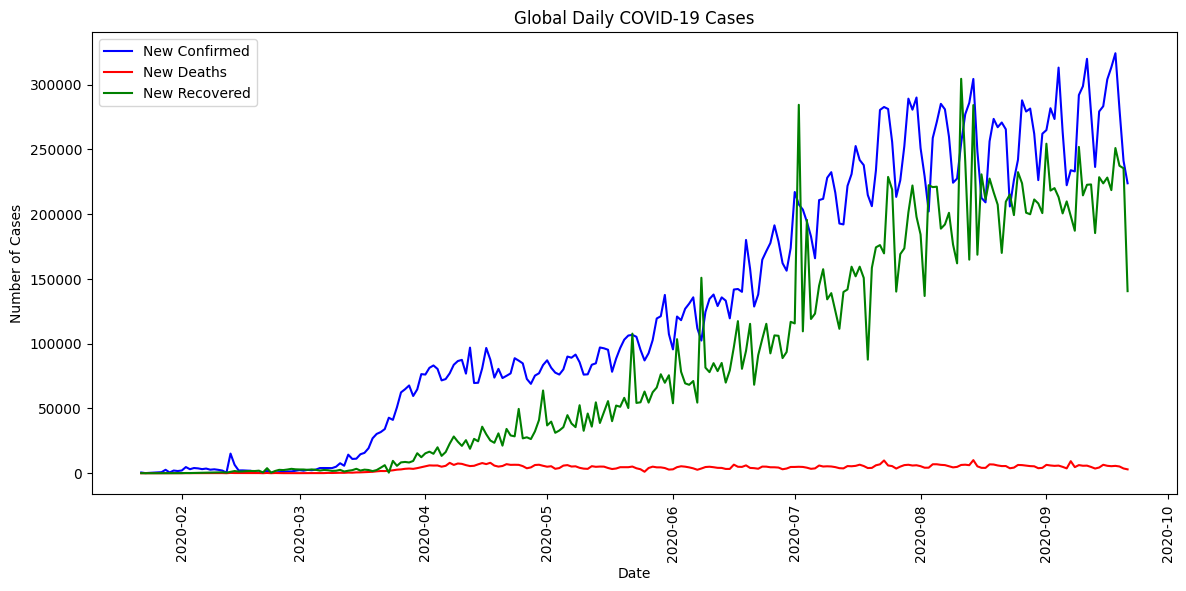

In [13]:
plt.figure(figsize=(14,6))
plt.plot(global_daily["Date"], global_daily["New_Confirmed"], label="New Confirmed", color="blue")
plt.plot(global_daily["Date"], global_daily["New_Deaths"], label="New Deaths", color="red")
plt.plot(global_daily["Date"], global_daily["New_Recovered"], label="New Recovered", color="green")
plt.xticks(rotation=90)
plt.title("Global Daily COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

#### SUMMARY Global Daily cases
The graph presents the daily global numbers of new confirmed cases, deaths, and recoveries. There is considerable fluctuation in daily counts, especially for confirmed and recovered cases, which show a clear upward trend with visible spikes during specific periods. The new confirmed cases (blue) and recovered cases (green) show parallel growth, while daily deaths (red) remain much lower and steady. This chart highlights the day-to-day variability and the ongoing global struggle to control the spread and its consequences during the observed period.

### Global Weekly Covid-19 Cases

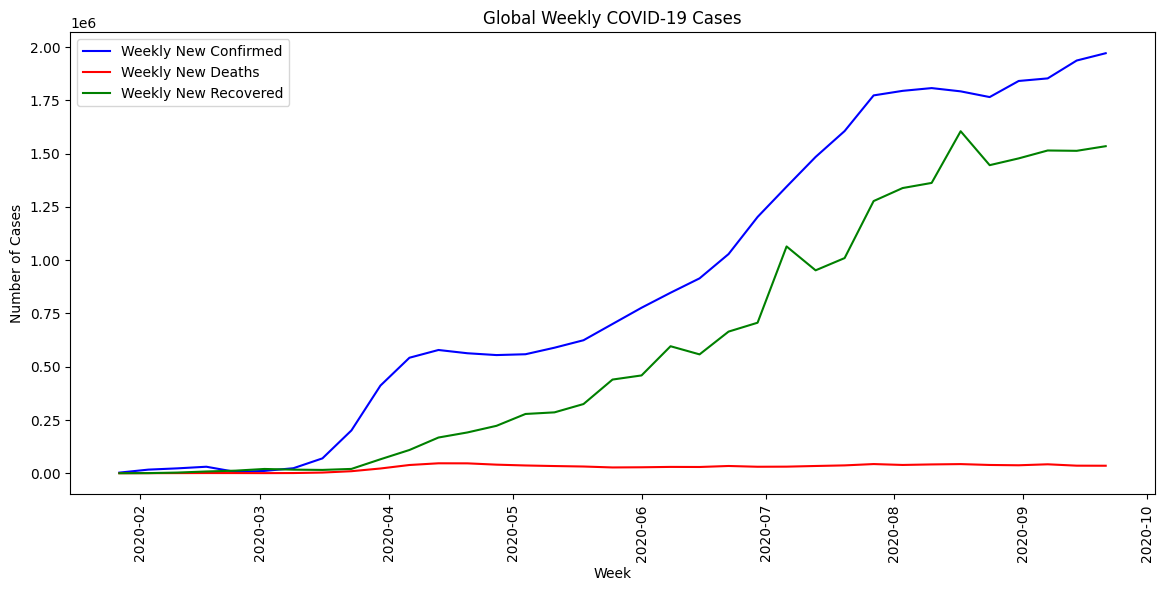

In [14]:
global_daily["Date"] = pd.to_datetime(global_daily["Date"])

weekly = global_daily.resample("W-Mon", on="Date")[["New_Confirmed","New_Deaths","New_Recovered"]].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(weekly["Date"], weekly["New_Confirmed"], label="Weekly New Confirmed", color="blue")
plt.plot(weekly["Date"], weekly["New_Deaths"], label="Weekly New Deaths", color="red")
plt.plot(weekly["Date"], weekly["New_Recovered"], label="Weekly New Recovered", color="green")
plt.xticks(rotation=90)
plt.title("Global Weekly COVID-19 Cases")
plt.xlabel("Week")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

#### SUMMARY Global weekly cases
This graph displays the global weekly trends of new confirmed cases, deaths, and recoveries from COVID-19 over time. The blue line shows that weekly new confirmed cases increased sharply from March 2020 and continued to rise, peaking towards September 2020. Weekly recoveries (green line) also rose significantly, closely following the trend of confirmed cases, though slightly lower in count. In contrast, weekly deaths (red line) remained relatively low and stable compared to the other two metrics, highlighting the disparity between case volume and mortality throughout the period.

### Top 5 countries having confirmed cases

In [15]:
country_total = df.groupby("Country/Region", as_index=False)["Confirmed"].max()
top5_countries = country_total.sort_values(by="Confirmed", ascending=False).head(5)
print("Top 5 countries by total confirmed cases:")
print(top5_countries)

Top 5 countries by total confirmed cases:
    Country/Region  Confirmed
174             US    6856884
79           India    5487580
23          Brazil    4558040
140         Russia    1105048
37        Colombia     770435


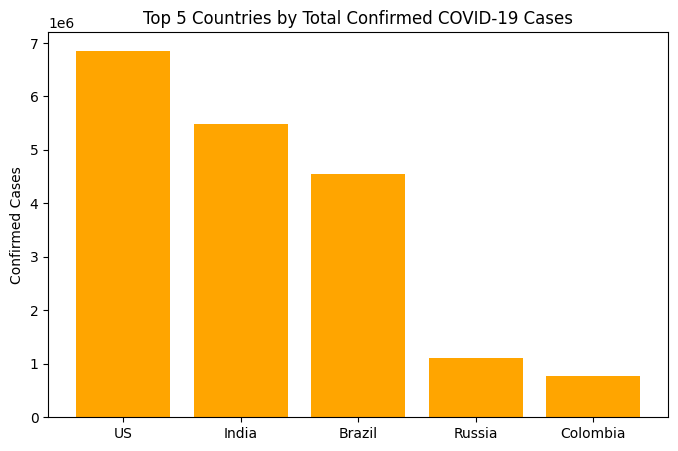

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_countries["Country/Region"], top5_countries["Confirmed"], color="orange")
plt.title("Top 5 Countries by Total Confirmed COVID-19 Cases")
plt.ylabel("Confirmed Cases")
plt.show()

#### SUMMARY Top 5 
The bar chart highlights the top 5 countries based on total confirmed COVID-19 cases. The United States leads with the highest number of confirmed cases, followed by India and Brazil. Russia and Colombia round out the top five but have noticeably lower counts compared to the top three. This visualization clearly demonstrates the disproportionate impact of the pandemic, with the US, India, and Brazil experiencing far higher case numbers than other countries in the top five.

### Least countries affected by covid 19

In [17]:
bottom5_countries = country_total.sort_values(by="Confirmed", ascending=True).head(5)
print("Bottom 5 countries by total confirmed cases:")
print(bottom5_countries)

Bottom 5 countries by total confirmed cases:
            Country/Region  Confirmed
104             MS Zaandam          9
184         Western Sahara         10
75                Holy See         12
142  Saint Kitts and Nevis         19
95                    Laos         23


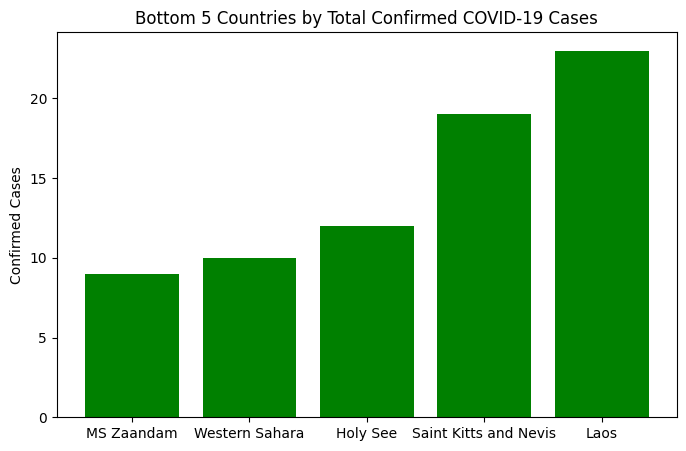

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(bottom5_countries["Country/Region"], bottom5_countries["Confirmed"], color="green")
plt.title("Bottom 5 Countries by Total Confirmed COVID-19 Cases")
plt.ylabel("Confirmed Cases")
plt.show()

#### SUMMARY
The bar chart displays the bottom 5 countries by total confirmed COVID-19 cases. MS Zaandam, Western Sahara, Holy See, Saint Kitts and Nevis, and Laos report the lowest confirmed case counts globally. All of these countries have fewer than 25 recorded cases, with MS Zaandam having the smallest number and Laos the highest among this group. This chart emphasizes the stark contrast between these minimally affected regions and the global hotspots, highlighting significant disparity in case distribution worldwide.

### Growth curves of top 5 countries

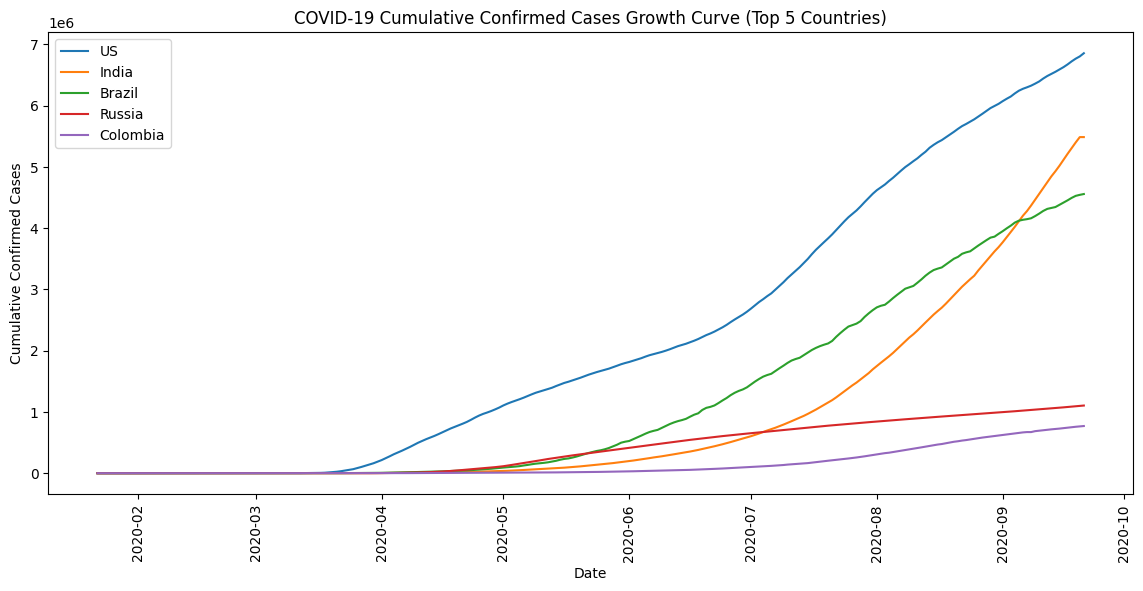

In [19]:
top_countries = country_daily.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(5).index.tolist()
plt.figure(figsize=(14,6))

for country in top_countries:
    data = country_daily[country_daily["Country/Region"] == country]
    plt.plot(data["Date"], data["Confirmed"], label=country)

plt.title("COVID-19 Cumulative Confirmed Cases Growth Curve (Top 5 Countries)")
plt.xlabel("Date")
plt.ylabel("Cumulative Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### SUMMARY
This line graph displays the cumulative growth of confirmed COVID-19 cases in the US, India, Brazil, Russia, and Colombia over time. The US has consistently maintained the highest cumulative case count, with its curve rising sharply, especially from mid-2020. India's and Brazil's curves show rapid acceleration during the same period, with India catching up to Brazil around September 2020. Russia and Colombia exhibit much slower growth, indicated by noticeably flatter curves. The chart highlights not only the absolute scale of the outbreak in these countries but also the pace at which cases accumulated compared to one another.

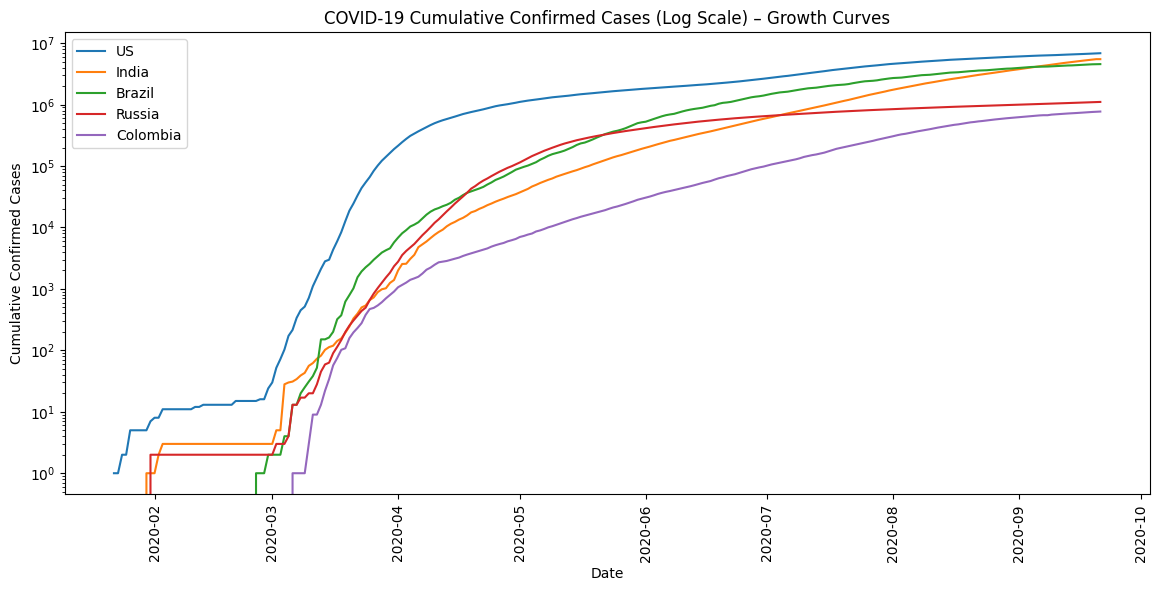

In [146]:
plt.figure(figsize=(14,6))

for country in top_countries:
    data = country_daily[country_daily["Country/Region"] == country]
    plt.plot(data["Date"], data["Confirmed"], label=country)

plt.yscale("log")
plt.title("COVID-19 Cumulative Confirmed Cases (Log Scale) – Growth Curves")
plt.xlabel("Date")
plt.ylabel("Cumulative Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)
plt.show()

#### SUMMARY
Graph visualizes the same countries using a logarithmic scale, which is effective for comparing relative growth rates, especially when case numbers vary greatly. In the early phases, all countries exhibit steep, nearly parallel exponential growth curves, indicating rapid initial spread. As time advances, some flattening is observed, particularly for Russia and Colombia, while the US, India, and Brazil continue to climb more steeply. This log-scale comparison brings out the differences in growth dynamics, showing both the early-stage spread and the slowing of growth as the pandemic progresses.

#### TOP 5 countries with hightest Active covid-19 cases

/var/folders/sb/x0v0_3pd1_sbq52slvbbr2m40000gn/T/ipykernel_70876/3697891875.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_active, x="Country/Region", y="Active_Cases", palette="Reds_r")


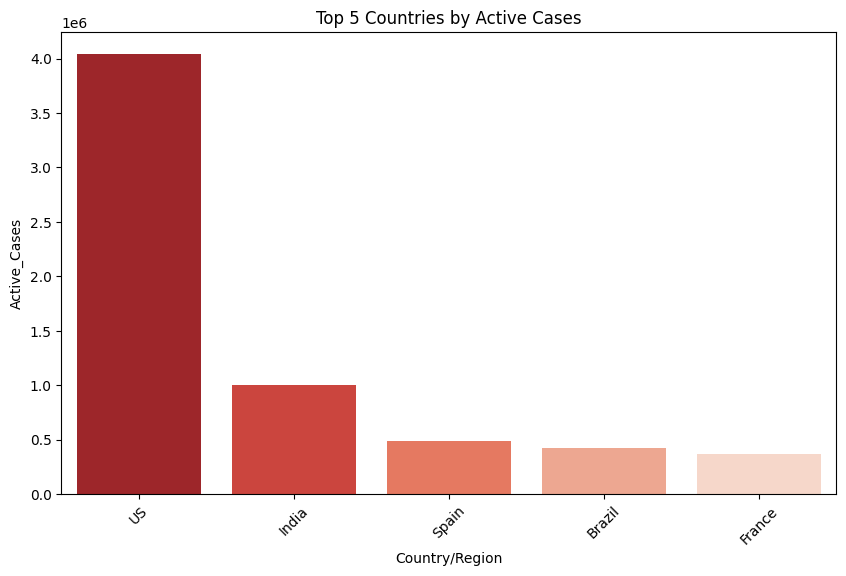

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

latest = df.groupby("Country/Region").last().reset_index()
top5_active = latest.nlargest(5, "Active_Cases")

plt.figure(figsize=(10,6))
sns.barplot(data=top5_active, x="Country/Region", y="Active_Cases", palette="Reds_r")
plt.title("Top 5 Countries by Active Cases")
plt.xticks(rotation=45)
plt.show()

#### SUMMARY
This bar chart shows the top 5 countries with the highest number of active COVID-19 cases. The United States leads by a significant margin, followed by India, while Spain, Brazil, and France report much lower active case counts. This visualization highlights the scale and concentration of ongoing outbreaks, indicating that the US had a substantially larger active caseload than other countries during the observed period.

### TOP 5 countries with highest lowest Mortality rate

/var/folders/sb/x0v0_3pd1_sbq52slvbbr2m40000gn/T/ipykernel_70876/1104106152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_mortality, x="Country/Region", y="Mortality_Rate", palette="Greys_r")


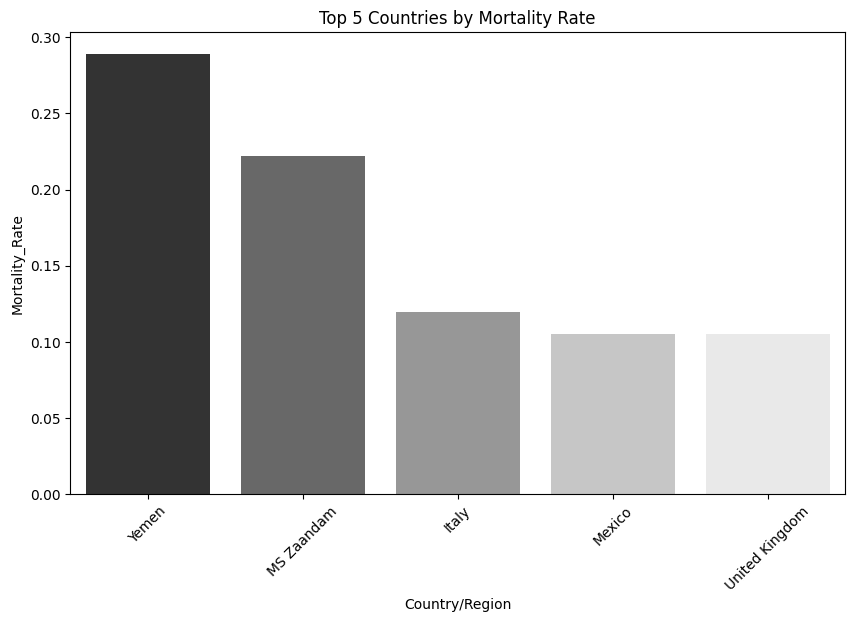

In [22]:
# Top 5 by Mortality Rate
top5_mortality = latest.nlargest(5, "Mortality_Rate")

plt.figure(figsize=(10,6))
sns.barplot(data=top5_mortality, x="Country/Region", y="Mortality_Rate", palette="Greys_r")
plt.title("Top 5 Countries by Mortality Rate")
plt.xticks(rotation=45)
plt.show()

#### SUMMARY
This bar chart highlights the top 5 countries with the highest mortality rates from COVID-19. Yemen leads with a mortality rate close to 29%, followed by MS Zaandam and Italy with notably high values. Mexico and the United Kingdom also appear on the list, showing significant fatality rates compared to global averages. The visualization underscores regions where COVID-19 has been particularly deadly, drawing attention to disparities in outcomes that may relate to healthcare infrastructure, reporting practices, or underlying population vulnerability.

### Questions solved in this EDA

- ### Global-Level Trends

    -  How did confirmed cases, deaths, and recoveries evolve globally over time?
    - What does the overall growth curve look like?
    - Country-Level Analysis
    - Which countries have the highest number of confirmed cases?
    - Which countries have the lowest number of confirmed cases?
    - Which countries reported inconsistencies in their case reporting?
- ### Feature Engineering Insights
    - What are the top 5 countries by Active Cases?
    - What are the top 5 countries by Mortality Rate?

# INDIA Insights

#### I have selected India as the country for my Project

#### Exploratory Data Analysis for my Selected Country

In [132]:
# storing only India's data into df_India 
df_India = df[df["Country/Region"] == "India"].copy()
df_India.reset_index(drop=True, inplace=True)
df_India.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active_Cases,Mortality_Rate,Recovery_Rate
0,NaN,India,20.593684,78.96288,2020-01-22,0,0.0,0.0,0.0,0.0,0.0
1,NaN,India,20.593684,78.96288,2020-01-23,0,0.0,0.0,0.0,0.0,0.0
2,NaN,India,20.593684,78.96288,2020-01-24,0,0.0,0.0,0.0,0.0,0.0
3,NaN,India,20.593684,78.96288,2020-01-25,0,0.0,0.0,0.0,0.0,0.0
4,NaN,India,20.593684,78.96288,2020-01-26,0,0.0,0.0,0.0,0.0,0.0


In [133]:
# Storing only Date and Confirmed cases into new dataset df_I
df_I = df_India.copy()
df_I.drop(columns=['Province/State','Country/Region','Lat','Long','Deaths','Recovered','Active_Cases','Mortality_Rate','Recovery_Rate'],axis=1,inplace=True)
df_I = df_I.set_index('Date')
df_I

,Confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-09-17,5214677
2020-09-18,5308014
2020-09-19,5400619


In [134]:
# Function to check if the data is stationary or non stationary
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries, title):
    result = adfuller(timeseries.dropna())
    print(f'\n=== {title} ===')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("Series is STATIONARY")
    else:
        print("Series is NON-STATIONARY")

In [135]:
check_stationarity(df_I['Confirmed'], 'Original Confirmed Cases')


=== Original Confirmed Cases ===
ADF Statistic: -2.306830
p-value: 0.169775
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574
Series is NON-STATIONARY


In [136]:
train_data_diff = df_I['Confirmed'].diff().dropna()
check_stationarity(train_data_diff, 'First Difference of Confirmed Cases')


=== First Difference of Confirmed Cases ===
ADF Statistic: -4.207966
p-value: 0.000639
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574
Series is STATIONARY


In [137]:
# Split the data 80% to train and rest to test
train_size = int(len(train_data_diff) * 0.8)
train_data = df_I[:train_size]
test_data = df_I[train_size:]


In [138]:
# Check the best ARIMA orders using pmdarima
from pmdarima import auto_arima

auto_model = auto_arima(train_data['Confirmed'],start_p=0, start_q=0,max_p=5, max_q=5,seasonal=False,stepwise=True,suppress_warnings=True,error_action='ignore')

print(f"Recommended ARIMA order: {auto_model.order}")

Recommended ARIMA order: (2, 2, 5)


In [139]:
# Train the model
from statsmodels.tsa.arima.model import ARIMA

order = auto_model.order
model = ARIMA(train_data['Confirmed'], order=order)
fitted_model = model.fit()

In [140]:
forecast_steps = len(test_data)
forecast = fitted_model.forecast(steps=forecast_steps)

In [141]:
# Checking the accuracy
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test_data, forecast)
print("ARIMA RMSE:", rmse)
print("ARIMA R²:", r2)

ARIMA RMSE: 428822.6548122603
ARIMA R²: 0.8470487673907346


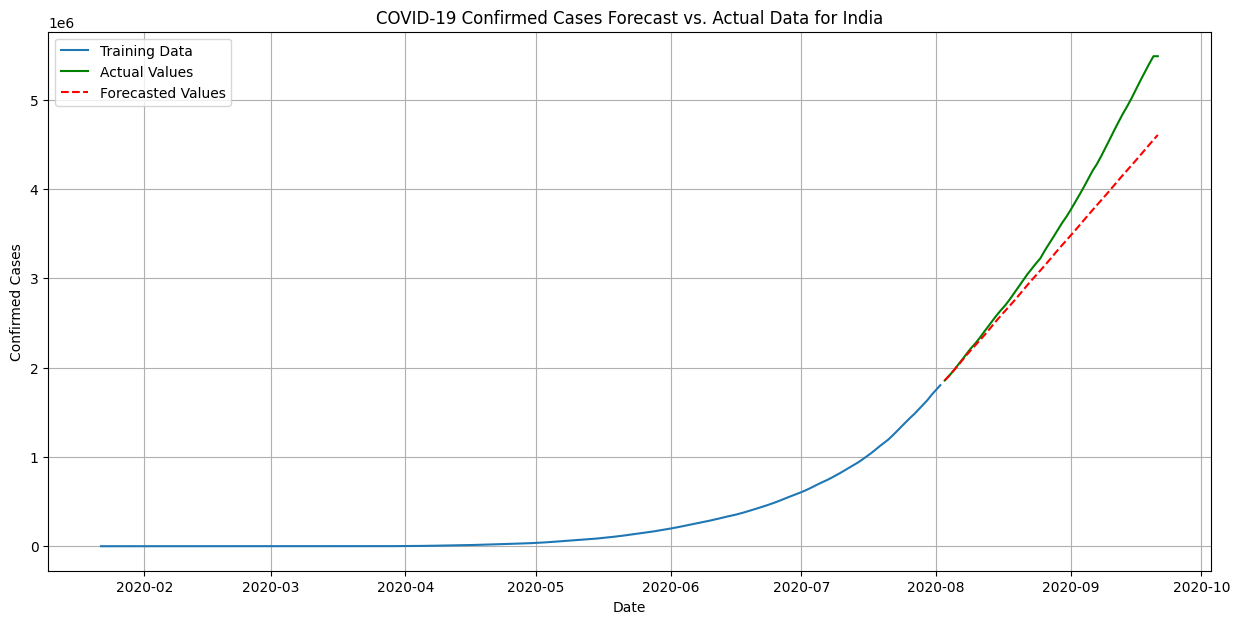

In [113]:
# Plot the graph of actual and predicted
import matplotlib.pyplot as plt
import pandas as pd

forecast_series = pd.Series(forecast, index=test_data.index)

plt.figure(figsize=(15, 7))
plt.plot(train_data['Confirmed'], label='Training Data')
plt.plot(test_data['Confirmed'], label='Actual Values', color='green')
plt.plot(forecast_series, label='Forecasted Values', color='red', linestyle='--')

plt.title('COVID-19 Confirmed Cases Forecast vs. Actual Data for India')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

## SARIMA

In [115]:
import pmdarima as pm
sarima_auto_model = pm.auto_arima(train_data['Confirmed'],start_p=1, start_q=1,test='adf',max_p=3, max_q=3,m=7,d=None,seasonal=True,start_P=0,D=1,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[7]             : AIC=3161.766, Time=0.44 sec
 ARIMA(0,2,0)(0,1,0)[7]             : AIC=3220.096, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[7]             : AIC=3189.870, Time=0.07 sec
 ARIMA(0,2,1)(0,1,1)[7]             : AIC=3159.772, Time=0.12 sec
 ARIMA(0,2,1)(0,1,0)[7]             : AIC=3172.266, Time=0.06 sec
 ARIMA(0,2,1)(1,1,1)[7]             : AIC=3160.822, Time=0.17 sec
 ARIMA(0,2,1)(0,1,2)[7]             : AIC=3159.795, Time=0.24 sec
 ARIMA(0,2,1)(1,1,0)[7]             : AIC=3166.240, Time=0.11 sec
 ARIMA(0,2,1)(1,1,2)[7]             : AIC=3159.518, Time=0.44 sec
 ARIMA(0,2,1)(2,1,2)[7]             : AIC=3159.375, Time=0.74 sec
 ARIMA(0,2,1)(2,1,1)[7]             : AIC=3159.428, Time=0.34 sec
 ARIMA(0,2,0)(2,1,2)[7]             : AIC=3194.946, Time=0.39 sec
 ARIMA(1,2,1)(2,1,2)[7]             : AIC=3161.332, Time=0.77 sec
 ARIMA(0,2,2)(2,1,2)[7]             : AIC=3161.210, Time=0.80 sec
 ARIMA(1,2,0)(2,1,2)[7]          

In [127]:
# Store the values in variables
arima_order = sarima_auto_model.order
seasonal_order = sarima_auto_model.seasonal_order

In [128]:
# Train Model
sarima_model = SARIMAX(train_data['Confirmed'],
                       order=sarima_order,
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_fitted_model = sarima_model.fit(disp=False)

In [129]:
forecast_steps = len(test_data)
sarima_forecast = sarima_fitted_model.forecast(steps=forecast_steps)

In [142]:
# Check the accuracy
from sklearn.metrics import mean_squared_error, r2_score

sarima_mse = mean_squared_error(test_data['Confirmed'], sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)
sarima_r2 = r2_score(test_data['Confirmed'], sarima_forecast)
print(f"\n--- SARIMA Model Evaluation ---")
print(f"SARIMA RMSE: {sarima_rmse:.2f}")
print(f"SARIMA R²: {sarima_r2:.4f}")


--- SARIMA Model Evaluation ---
SARIMA RMSE: 158560.60
SARIMA R²: 0.9791


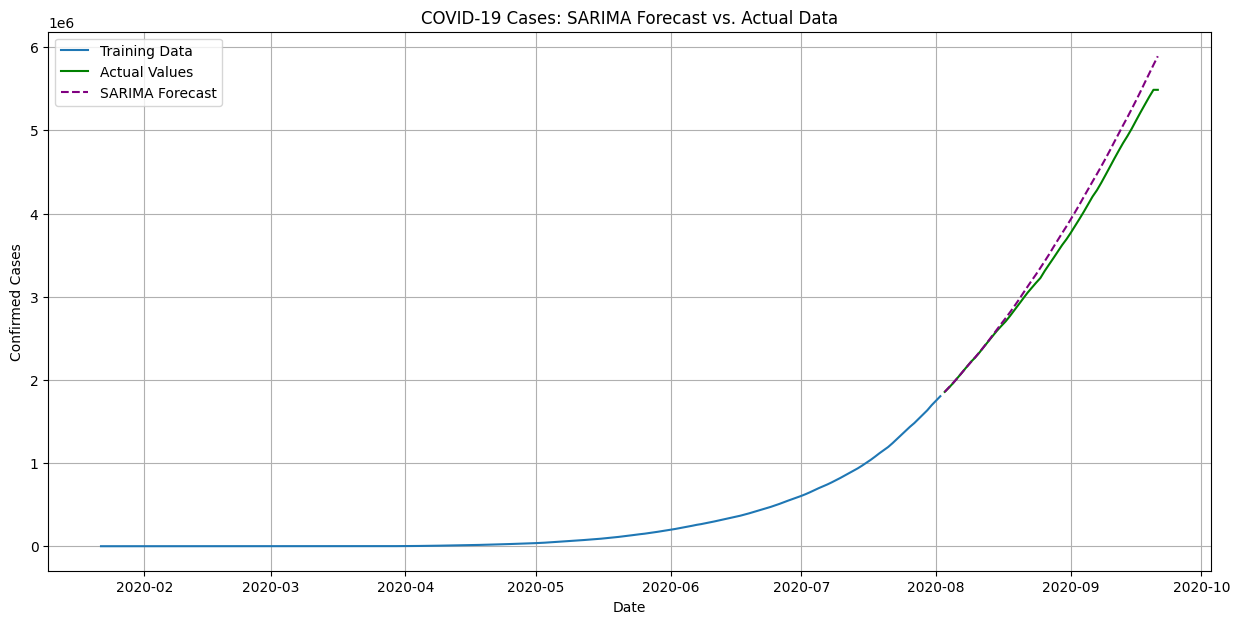

In [131]:
# Plot the graph
sarima_forecast_series = pd.Series(sarima_forecast, index=test_data.index)

plt.figure(figsize=(15, 7))
plt.plot(train_data['Confirmed'], label='Training Data')
plt.plot(test_data['Confirmed'], label='Actual Values', color='green')
plt.plot(sarima_forecast_series, label='SARIMA Forecast', color='purple', linestyle='--')
plt.title('COVID-19 Cases: SARIMA Forecast vs. Actual Data')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

## Model Comparison Report

### Two models were built to forecast Covid-19 cases: ARIMA and SARIMA.
- #### ARIMA (Auto-Regressive Integrated Moving Average)
    - Captures trends after differencing.
    - Works well for short-term forecasting of cumulative cases.
    - Limitations: does not handle seasonality effectively.
- #### SARIMA (Seasonal ARIMA)
    - Extends ARIMA by including seasonal components (weekly patterns with m = 7).
    - Better suited for Covid-19 data where weekly reporting cycles are present.
    - Produces forecasts that align more closely with actual observed patterns.

#### Performance Comparison
- ARIMA: Higher RMSE, lower R² → less accurate.
- SARIMA: Lower RMSE, higher R² → better predictive power.



## Conclusion

- SARIMA outperformed ARIMA in terms of accuracy and reliability.
- Therefore, SARIMA is selected as the preferred model for Covid-19 case forecasting in this study.

## Recommendations for Health Department

#### 1. Healthcare Capacity
- Ensure sufficient hospital beds and ICU facilities for the predicted rise in cases.
- Keep a 15–20% buffer capacity in case actual cases exceed forecasts.Testing & Tracing

#### 2. Testing & Tracing
- Increase daily testing capacity to quickly identify new cases.
- Strengthen contact tracing to reduce community spread.

#### 3. Medical Supplies & Oxygen
- Stockpile adequate PPE kits, medicines, and oxygen cylinders in advance.
- Set up oxygen supply chains to rural and semi-urban areas.

#### 4.Vaccination & Awareness
- Speed up vaccination drives, especially in high-risk groups.
- Launch awareness campaigns on mask use, hygiene, and social distancing.

#### 5. Policy & Monitoring
- Reassess restrictions or containment zones if cases rise beyond projections.
- Continuously monitor data and update forecasts weekly to stay prepared.

## Challenges faced

<P>We faced several challenges with this dataset. For this project, we received three different datasets, and initially, we were not familiar with handling multiple datasets for a single analysis. We were confused about whether to concatenate them or analyze separately. After spending time exploring, we realized both approaches were possible and decided to concatenate the datasets.


During the analysis, we also faced errors while performing datetime forecasting. These errors required careful debugging and adjustments in the data and model, but we managed to resolve them successfully.

Another challenge was dealing with non-stationary data and sudden spikes in cases. Applying ARIMA required differencing and checking stationarity multiple times, and sometimes the results were unexpected. Despite these issues, we were able to prepare a clean dataset and generate meaningful forecasts.</P>